# **Examen de certificación – Intento 2**

*Descripción*

Fundamentos de Data Science

Analizando la Satisfacción de Clientes en la Industria Hotelera

## *Requisitos:*

Tu tarea es **limpiar y explorar un dataset** que contiene información sobre la **satisfacción de los clientes en la industria hotelera.** Este análisis es crucial para los ejecutivos de la empresa que **buscan entender mejor las opiniones y experiencias de sus clientes para mejorar los servicios ofrecidos.**

El dataset puede ser encontrado  en el siguiente link.
https://www.kaggle.com/datasets/jessemostipak/hotel-booking-demand

# Previos
- Cargar librerías
- Cargar datos

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
df = pd.read_csv('/content/hotel_bookings_intento_2.csv')

# 1) Limpieza de datos con Python

In [3]:
# Revisar información inicial del df
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118839 entries, 0 to 118838
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           118839 non-null  object 
 1   is_canceled                     118839 non-null  int64  
 2   lead_time                       118839 non-null  int64  
 3   arrival_date_year               118839 non-null  int64  
 4   arrival_date_month              118839 non-null  object 
 5   arrival_date_week_number        118839 non-null  int64  
 6   arrival_date_day_of_month       118839 non-null  int64  
 7   stays_in_weekend_nights         118839 non-null  int64  
 8   stays_in_week_nights            118839 non-null  int64  
 9   adults                          118839 non-null  int64  
 10  children                        118835 non-null  float64
 11  babies                          118839 non-null  int64  
 12  meal            

## a) Detección y eliminación de valores duplicados:
Asegúrate de que cada registro en el dataset sea único.


In [4]:
# Consultar si hay duplicados, cuántos
print("a. ¿Hay duplicados en el DataFrame?")
print(df.duplicated().any())
print("\nb. ¿Cuántos duplicados hay en el DataFrame?")
print(df.duplicated().sum())

a. ¿Hay duplicados en el DataFrame?
True

b. ¿Cuántos duplicados hay en el DataFrame?
31833


In [6]:
# Si eliminó los duplicados cuanto es el porcentaje de datos que pierdo?
filas_duplicadas = df.duplicated().sum()
total_filas = len(df)
porcentaje_perdido_duplicados = (filas_duplicadas / total_filas) * 100

print(f"\nPorcentaje de datos perdidos debido a remover duplicados: {porcentaje_perdido_duplicados:.2f}%")


Porcentaje de datos perdidos debido a remover duplicados: 26.79%


In [7]:
# Eliminar duplicados
df = df.drop_duplicates()

In [8]:
# Revisar información inicial del df
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 87006 entries, 0 to 118838
Data columns (total 32 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   hotel                           87006 non-null  object 
 1   is_canceled                     87006 non-null  int64  
 2   lead_time                       87006 non-null  int64  
 3   arrival_date_year               87006 non-null  int64  
 4   arrival_date_month              87006 non-null  object 
 5   arrival_date_week_number        87006 non-null  int64  
 6   arrival_date_day_of_month       87006 non-null  int64  
 7   stays_in_weekend_nights         87006 non-null  int64  
 8   stays_in_week_nights            87006 non-null  int64  
 9   adults                          87006 non-null  int64  
 10  children                        87002 non-null  float64
 11  babies                          87006 non-null  int64  
 12  meal                            8700

### *Análisis*
Al eliminarse los duplicados, se pasó de 118839 filas de registros a 87005  filas de regristros únicos

Si bien fue una reducción de casi el 27%, el eliminar duplicados lo consideré por la siguiente razón, los datos duplicados pueden deberse específicamente a errores de sistema, cargar varias veces los datos, y posiblemente a que, varias personas (adultos en específico) de la misma familia o de el mismo evento pudieron haber registrado la misma información (suele suceder), por ello pueden presentarse el mismo dato más de una vez.




## b) Verificación y ajuste de tipos de datos:
Asegúrate de que todas las columnas coincidan con los tipos de datos indicados en el diccionario de datos.

Datos de la documentación que considero necesarios

- is_canceled: 1: sí, 0: no
- lead_time: Número de días transcurridos entre la fecha de entrada de la reserva en el PMS y la fecha de llegada... Property Management System, es un software hotelero destinado a gestionar todas las actividades de un hotel.
- stays_in_weekend_nights: Número de noches de fin de semana (sábado o domingo) que el huésped se alojó o reservó para alojarse en el hotel
- stays_in_week_nights: Número de noches de la semana (de lunes a viernes) que el huésped se alojó o reservó para alojarse en el hotel
- adults: # adultos, children: # niños, babies: # bebes
- meal: Tipo de comida reservada. Las categorías se presentan en paquetes de comidas de hospitalidad estándar: Sin definir/SC: sin paquete de comidas; BB: alojamiento y desayuno; HB: media pensión (desayuno y otra comida, normalmente la cena); FB: pensión completa (desayuno, almuerzo y cena).
- country: Country of origin. Categories are represented in the ISO 3155–3:2013 format
- distribution_channel: Designación del segmento de mercado. En las categorías, el término «AT» significa «agencias de viajes» y «TO» significa «turoperadores».
- is_repeated_guest: 1: si, 0: no
- previous_cancellations: Número de reservas anteriores canceladas por el cliente antes de la reserva actual
- previous_bookings_not_canceled: Número de reservas anteriores no canceladas por el cliente antes de la reserva actual
- booking_changes: Número de cambios/enmiendas realizados en la reserva desde el momento en que se introdujo la reserva en el PMS hasta el momento de la facturación o cancelación.
- deposit_type: Indicación de si el cliente hizo un depósito para garantizar la reserva. Esta variable puede asumir tres categorías: Sin depósito: no se realizó ningún depósito; No reembolsable: se realizó un depósito por valor del coste total de la estancia; Reembolsable: se realizó un depósito por valor inferior al coste total de la estancia.
- days_in_waiting_list: Número de días que la reserva estuvo en lista de espera antes de ser confirmada al cliente
- **customer_type: Tipo de reserva, asumiendo una de las cuatro categorías: Contrato - cuando la reserva tiene asociada una adjudicación u otro tipo de contrato; Grupo - cuando la reserva está asociada a un grupo; Transitoria - cuando la reserva no forma parte de un grupo o contrato, y no está asociada a otra reserva transitoria; Transitoria-parte - cuando la reserva es transitoria, pero está asociada al menos a otra reserva transitoria.**
- adr: Tarifa media diaria definida dividiendo la suma de todas las transacciones de alojamiento por el número total de noches de estancia.
- reservation_status: Último estado de la reserva, asumiendo una de las tres categorías: Cancelada: el cliente ha cancelado la reserva; Check-Out: el cliente se ha registrado pero ya se ha marchado; No-Show: el cliente no se ha registrado y ha informado al hotel del motivo.
- reservation_status_date: Fecha en la que se estableció el último estado. Esta variable se puede utilizar junto con ReservationStatus para saber cuándo se canceló la reserva o cuándo abandonó el cliente el hotel.
- Variables codificadas que si bien pueden ser analizadas, no les veo fin operativo para el ejercicio: reserved_room_type, assigned_room_type,

In [9]:
# Realizo el siguiente bucle para revisar valores únicos y el conteo de estos en cada columna
for column in df.columns:
    print(f"\nConteo de valores únicos en la columna '{column}':")
    print(df[column].dtype,'\n',df[column].value_counts().sort_index())


Conteo de valores únicos en la columna 'hotel':
object 
 hotel
City Hotel      53038
Resort Hotel    33968
Name: count, dtype: int64

Conteo de valores únicos en la columna 'is_canceled':
int64 
 is_canceled
0    62981
1    24025
Name: count, dtype: int64

Conteo de valores únicos en la columna 'lead_time':
int64 
 lead_time
0      5959
1      3207
2      1925
3      1700
4      1567
       ... 
622       2
626       1
629       2
709       1
737       1
Name: count, Length: 479, dtype: int64

Conteo de valores únicos en la columna 'arrival_date_year':
int64 
 arrival_date_year
2015    13313
2016    42391
2017    31302
Name: count, dtype: int64

Conteo de valores únicos en la columna 'arrival_date_month':
object 
 arrival_date_month
April         7908
August       10867
December      5131
February      6098
January       4693
July         10057
June          7765
March         7513
May           8355
November      4995
October       6934
September     6690
Name: count, dtype: int64

C

## *Análisis*
Considero que, hay que cambiar algunos datos de las columnas Children por int porque es una cantidad entera, pero se debió de eliminar algunos datos nulos (como 5 datos), también la columna de fecha, mientras que agent y company por object, ya que son ID, y no un número como tal

In [11]:
# Eliminar filas con valores nulos en la columna 'children'
df = df.dropna(subset=['children'])

# Cambiar el tipo de dato de la columna 'children' a entero
df['children'] = df['children'].astype(int)

<ipython-input-11-5c4cdcc6cbdf>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['children'] = df['children'].astype(int)


In [12]:
# Cambiar el tipo de dato de las columnas 'agent' y 'company' a object (texto)
df['agent'] = df['agent'].astype(object)
df['company'] = df['company'].astype(object)

In [14]:
# Convertir 'reservation_status_date' a fecha
df['reservation_status_date'] = pd.to_datetime(df['reservation_status_date'])

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 87002 entries, 0 to 118838
Data columns (total 32 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   hotel                           87002 non-null  object        
 1   is_canceled                     87002 non-null  int64         
 2   lead_time                       87002 non-null  int64         
 3   arrival_date_year               87002 non-null  int64         
 4   arrival_date_month              87002 non-null  object        
 5   arrival_date_week_number        87002 non-null  int64         
 6   arrival_date_day_of_month       87002 non-null  int64         
 7   stays_in_weekend_nights         87002 non-null  int64         
 8   stays_in_week_nights            87002 non-null  int64         
 9   adults                          87002 non-null  int64         
 10  children                        87002 non-null  int64         
 11  babies

## c) Consistencia en valores categóricos:
Identifica y corrige cualquier inconsistencia en los valores categóricos (por ejemplo, ‘yes’, ‘Yes’, ‘YES’).

### *Análisis*
Con el código realizado más arriba se pudo revisar este punto, por lo que se concluye que no es necesario realizar algún tipo de corrección en cuanto a inconsistencias en valores categóricos

    -->for column in df.columns:
    print(f"\nConteo de valores únicos en la columna '{column}':")
    print(df[column].dtype,'\n',df[column].value_counts().sort_index())




## d) Manejo de valores faltantes:
Identifica y maneja cualquier valor faltante en el dataset. Rellena los valores faltantes con un marcador adecuado para el tipo de dato.


In [16]:
# Identificar valores nulos en todo el DataFrame
print(df.isnull().sum())

hotel                                 0
is_canceled                           0
lead_time                             0
arrival_date_year                     0
arrival_date_month                    0
arrival_date_week_number              0
arrival_date_day_of_month             0
stays_in_weekend_nights               0
stays_in_week_nights                  0
adults                                0
children                              0
babies                                0
meal                                  0
country                             452
market_segment                        0
distribution_channel                  0
is_repeated_guest                     0
previous_cancellations                0
previous_bookings_not_canceled        0
reserved_room_type                    0
assigned_room_type                    0
booking_changes                       0
deposit_type                          0
agent                             12171
company                           81748


In [19]:
# Revisar los porcentajes de estos datos nulos
null_percentage = (df.isnull().sum() / len(df)) * 100
null_percentage.round(2)

,0
hotel,0.00
is_canceled,0.00
lead_time,0.00
arrival_date_year,0.00
arrival_date_month,0.00
arrival_date_week_number,0.00
arrival_date_day_of_month,0.00
stays_in_weekend_nights,0.00
stays_in_week_nights,0.00
adults,0.00


### *Análisis*
Como agent y company son ID como tal, y considero que los porcentajes de nulos son muy altos, lo mejor es eliminar las columnas y después eliminar los nulos que serían menos del 1%

In [20]:
# Eliminar las columnas 'agent' y 'company'
df = df.drop(['agent', 'company'], axis=1)

In [21]:
# Eliminar filas con valores nulos restantes
df = df.dropna()

# Verificar si aún quedan valores nulos
print(df.isnull().sum())

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests   

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 86549 entries, 0 to 118837
Data columns (total 30 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   hotel                           86549 non-null  object        
 1   is_canceled                     86549 non-null  int64         
 2   lead_time                       86549 non-null  int64         
 3   arrival_date_year               86549 non-null  int64         
 4   arrival_date_month              86549 non-null  object        
 5   arrival_date_week_number        86549 non-null  int64         
 6   arrival_date_day_of_month       86549 non-null  int64         
 7   stays_in_weekend_nights         86549 non-null  int64         
 8   stays_in_week_nights            86549 non-null  int64         
 9   adults                          86549 non-null  int64         
 10  children                        86549 non-null  int64         
 11  babies

## e) Detección de datos anómalos:
Identifica y corrige cualquier punto de dato inapropiado o inusual (por ejemplo, una estancia de 1000 noches).


In [23]:
df.describe().round(1)

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,reservation_status_date
count,86549.0,86549.0,86549.0,86549.0,86549.0,86549.0,86549.0,86549.0,86549.0,86549.0,86549.0,86549.0,86549.0,86549.0,86549.0,86549.0,86549.0,86549.0,86549
mean,0.3,80.0,2016.2,26.8,15.8,1.0,2.6,1.9,0.1,0.0,0.0,0.0,0.2,0.3,0.8,106.5,0.1,0.7,2016-08-30 00:19:23.992651520
min,0.0,0.0,2015.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-6.4,0.0,0.0,2014-10-17 00:00:00
25%,0.0,12.0,2016.0,16.0,8.0,0.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,72.2,0.0,0.0,2016-03-18 00:00:00
50%,0.0,49.0,2016.0,27.0,16.0,1.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,98.1,0.0,0.0,2016-09-06 00:00:00
75%,1.0,125.0,2017.0,37.0,23.0,2.0,4.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,134.0,0.0,1.0,2017-03-04 00:00:00
max,1.0,737.0,2017.0,53.0,31.0,16.0,41.0,55.0,10.0,10.0,1.0,26.0,72.0,21.0,391.0,5400.0,8.0,5.0,2017-09-14 00:00:00
std,0.4,85.9,0.7,13.7,8.8,1.0,2.0,0.6,0.5,0.1,0.2,0.4,1.7,0.7,10.1,55.0,0.3,0.8,NaN


- En lead_time el 75% está en 125, y el máximo en 737, pero según veo más arriba, también hay datos de 709, 629, 626 y así, osea que si es posible que hayan reservas con esa cantidad de días, lo interesante sería revisar después si todos estos outliers son un "grupo" aparte de análisis.
- Supuse que, en el la cantidad de noches de estadía en semana o fin de semana, depende es de la fecha de entrada, si fue en semana o fin de semana, ya que, si es posible que alguien se hospede esa cantidad de días, ya es definir por otro lado, cantidad de fines de semana hospedados, que sería diferente a días de fin de semana hospedados, ya que los únicos valores viables en esta variable serían 0, 1 y máximo 2.
- Por encima de 5 adultos, se debería revisar si son "grupos" y cantidades de noches (porque también pueden cosiderarse eventos especiales), habría que mirar como graficar y observar estos datos
- En cancelaciones previas, si hay valores extremos que se deberían revisar graficamente, también, en análisis más avanzados, se podría filtrar este tipo de usuarios, porque si son clientes que tienen tantas cancelaciones, supondría hay condiciones especiales con ellos, además, si todos estan en un sistema unificado (de todas las reservas) considero que es algo alarmante, pero si es tanta cantidad de cancelaciones en el mismo sitio es preocupante, dado que estaría ocupando una reserva o espacio que no se usaría o pagaría, con el riesgo a estar perdiendo otros clientes.
- Así mismo, habría posible una segmentación de clientes con aquellos que no tienden a tener cancelaciones de reservas.
- Hay reservas en lista de espera de hasta más de un año.
- **En adr se nota un tema que si debería analizarse y es que un valor mínimo de -6.38, lo que sugiere que el hotel le pagó al cliente, y no al revés, también hay 1775 datos donde la tarifa fue 0, lo cual pueden ser noches de cortesía o gratis o regalos, pero de no ser así, sería datos erroneos, así mismo como datos muy bajos (suponiendo que sean dólares), ya que hay datos por debajo del q1 o  25% de los datos, muy por debajo, pero este q1 está "cercano" al q2 y al q3, incluso a la media, finalmente en esta variable hay valores altos, pero el valor máximo pareciera que está errado, porque de 510 pasa a 5400 por noche, así que, como es un valor extremo y solo uno, supongo que fue un error en digitación y hago la corrección respectiva quitándole un cero.**








In [26]:
# Asumiendo un valor anómalo en adr de 5400.0, lo corrijo a 540.0
df.loc[df['adr'] == 5400.0, 'adr'] = 540.0

In [27]:
# Verificando el cambio
df.describe().round(1)

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,reservation_status_date
count,86549.0,86549.0,86549.0,86549.0,86549.0,86549.0,86549.0,86549.0,86549.0,86549.0,86549.0,86549.0,86549.0,86549.0,86549.0,86549.0,86549.0,86549.0,86549
mean,0.3,80.0,2016.2,26.8,15.8,1.0,2.6,1.9,0.1,0.0,0.0,0.0,0.2,0.3,0.8,106.4,0.1,0.7,2016-08-30 00:19:23.992651520
min,0.0,0.0,2015.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-6.4,0.0,0.0,2014-10-17 00:00:00
25%,0.0,12.0,2016.0,16.0,8.0,0.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,72.2,0.0,0.0,2016-03-18 00:00:00
50%,0.0,49.0,2016.0,27.0,16.0,1.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,98.1,0.0,0.0,2016-09-06 00:00:00
75%,1.0,125.0,2017.0,37.0,23.0,2.0,4.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,134.0,0.0,1.0,2017-03-04 00:00:00
max,1.0,737.0,2017.0,53.0,31.0,16.0,41.0,55.0,10.0,10.0,1.0,26.0,72.0,21.0,391.0,540.0,8.0,5.0,2017-09-14 00:00:00
std,0.4,85.9,0.7,13.7,8.8,1.0,2.0,0.6,0.5,0.1,0.2,0.4,1.7,0.7,10.1,52.0,0.3,0.8,NaN


# 2) Exploración de datos con Python:

## a) Visualizaciones exploratorias univariadas:
Crea dos tipos diferentes de visualizaciones univariadas. Cada visualización debe incluir una breve interpretación dentro del archivo de código.

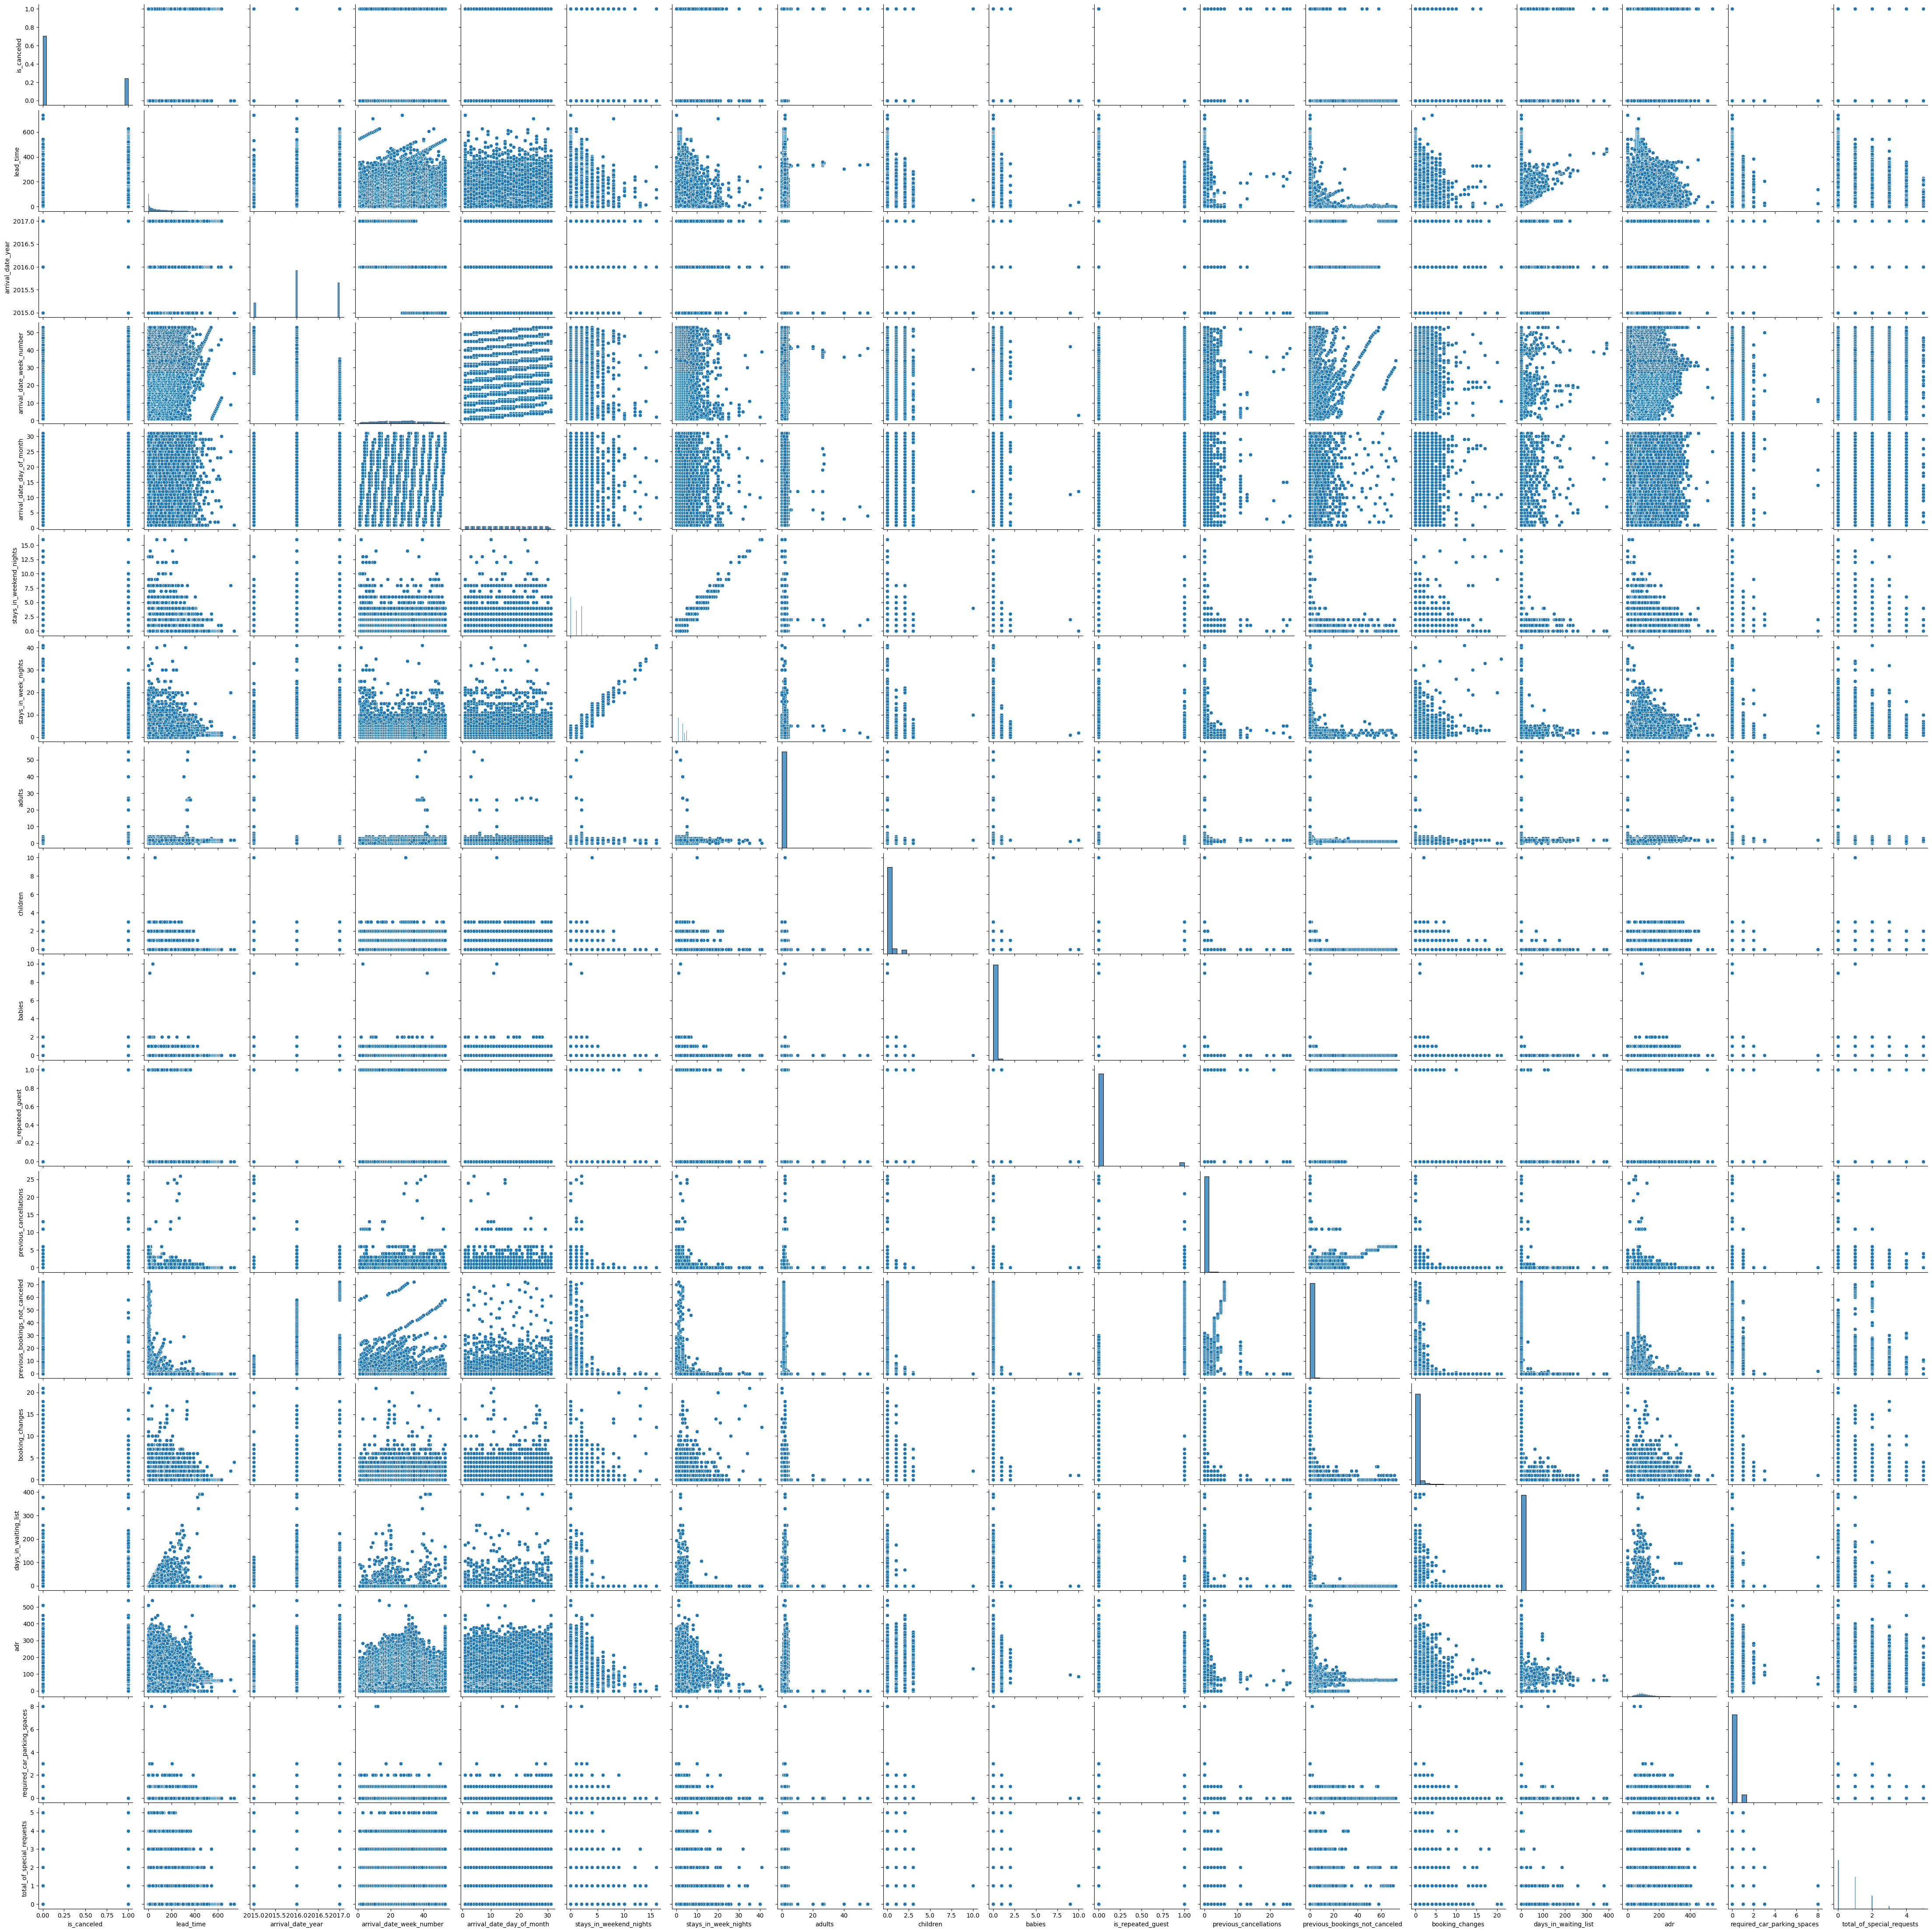

In [32]:
# Esto es solamente exploratorio, y bastante difícil de leer
sns.pairplot(df.select_dtypes(include=np.number))
plt.show()

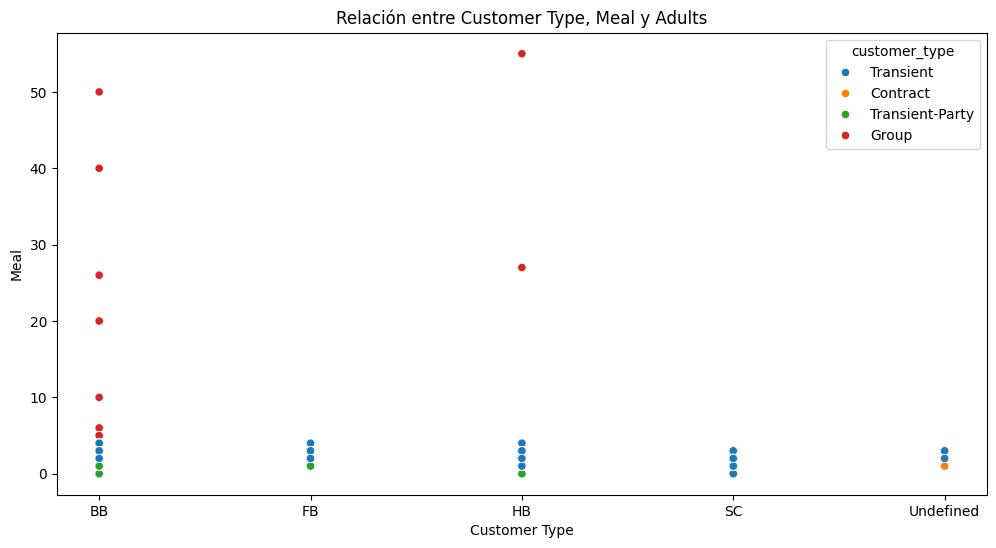

In [30]:
# Gráfico de dispersión para ver y confirmar cantidad de adultos
plt.figure(figsize=(12, 6))
sns.scatterplot(x='meal', y='adults', hue='customer_type', data=df)
plt.title('Relación entre Customer Type, Meal y Adults')
plt.xlabel('Customer Type')
plt.ylabel('Meal')
plt.show()

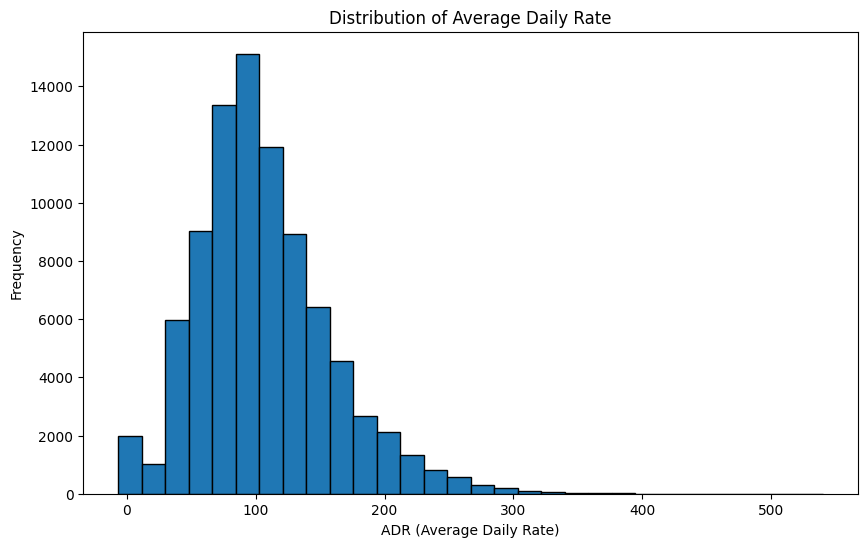

In [34]:
plt.figure(figsize=(10, 6))
plt.hist(df['adr'], bins=30, edgecolor='black')
plt.xlabel('ADR (Average Daily Rate)')
plt.ylabel('Frequency')
plt.title('Distribution of Average Daily Rate')
plt.show()

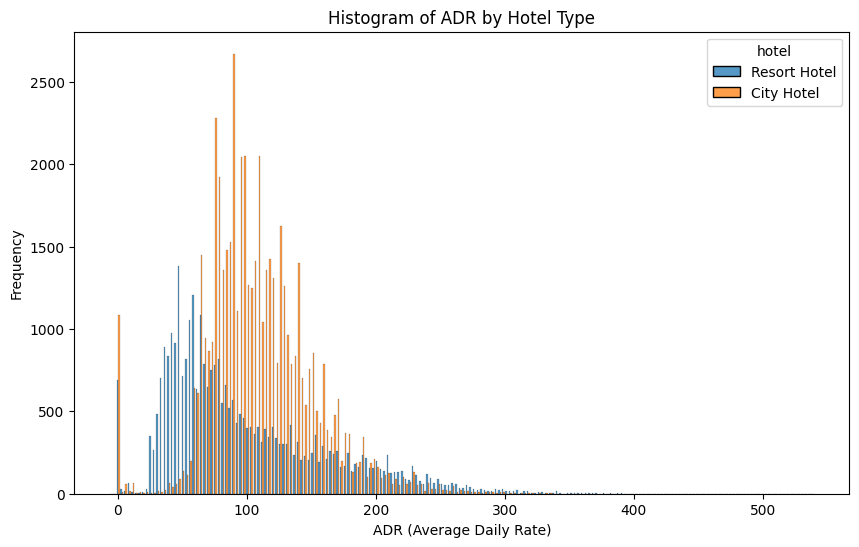

In [37]:
# prompt: histograma de adr por tipos de hotel

# Create the histogram
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='adr', hue='hotel', multiple='dodge', shrink=0.8)
plt.xlabel('ADR (Average Daily Rate)')
plt.ylabel('Frequency')
plt.title('Histogram of ADR by Hotel Type')
plt.show()

In [68]:
# Datos diferenciados por tipo de hotel para revisar estadísticas diferenciadas para adr
hotel_adr_description = df.groupby('hotel')['adr'].describe()
hotel_adr_description

,count,mean,std,min,25%,50%,75%,max
hotel,,,,,,,,
City Hotel,53027.0,110.744151,42.223464,0.00,83.83,105.3,133.5,540.0
Resort Hotel,33522.0,99.523146,63.818463,-6.38,52.20,80.0,135.0,508.0


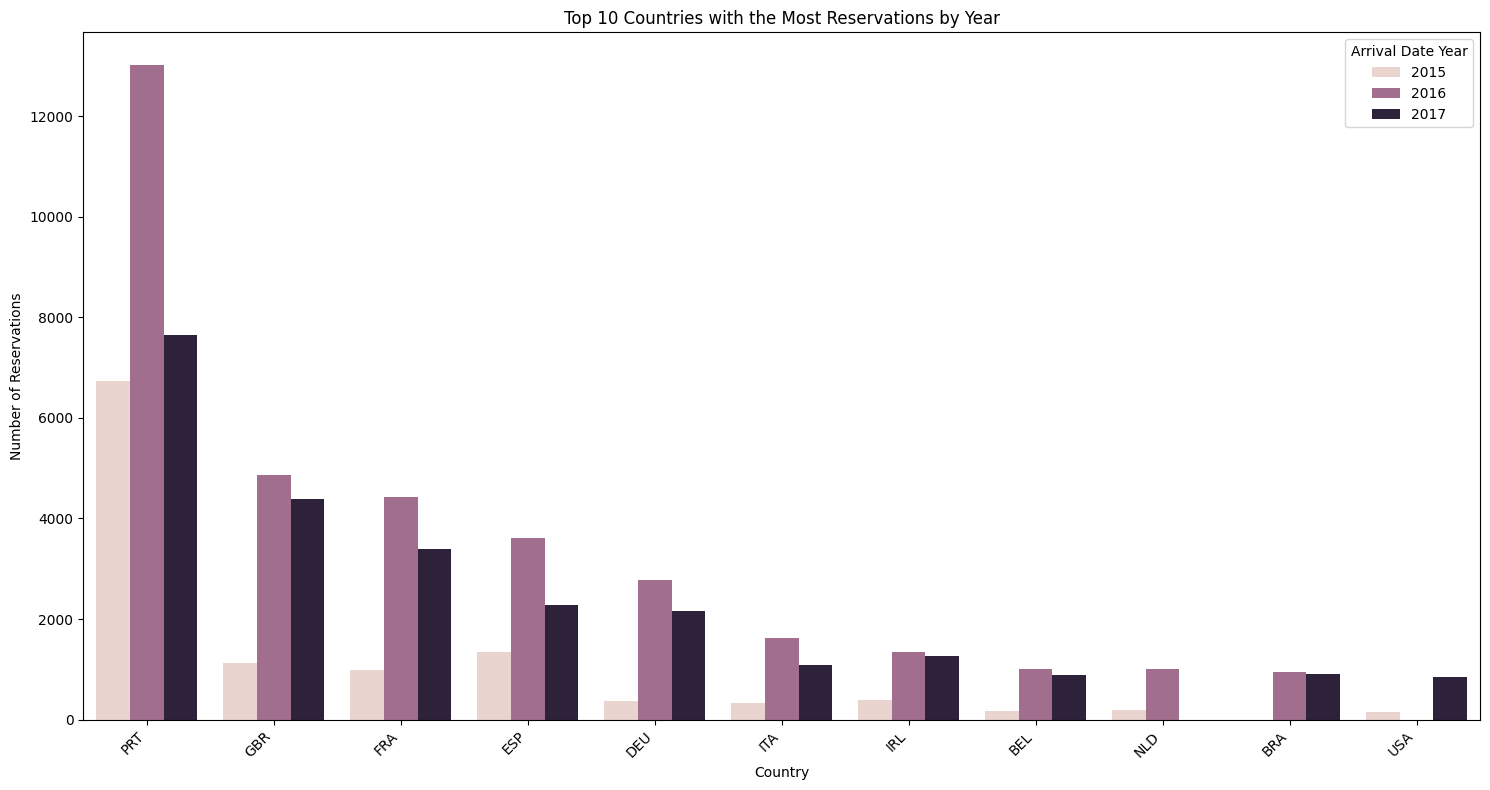

In [66]:
# Gráfico de barras con top 10 países con mayores reservas diferenciado por el año
# Crear el top, con la agrupación o selección
top_countries = df.groupby(['country', 'arrival_date_year'])['is_canceled'].count().reset_index()
top_countries = top_countries.sort_values(by='is_canceled', ascending=False).groupby('arrival_date_year').head(10)

plt.figure(figsize=(15, 8))
sns.barplot(x='country', y='is_canceled', hue='arrival_date_year', data=top_countries, dodge=True)
plt.xlabel("Country")
plt.ylabel("Number of Reservations")
plt.title("Top 10 Countries with the Most Reservations by Year")
plt.xticks(rotation=45, ha='right')
plt.legend(title='Arrival Date Year')
plt.tight_layout()
plt.show()

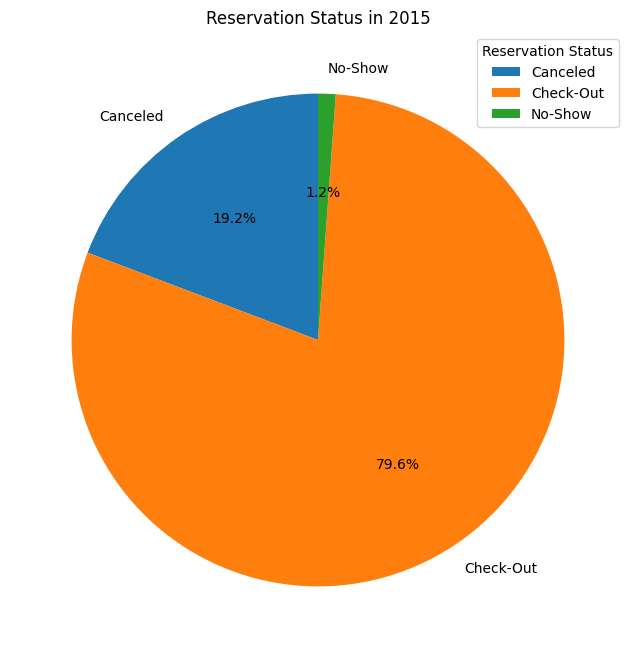

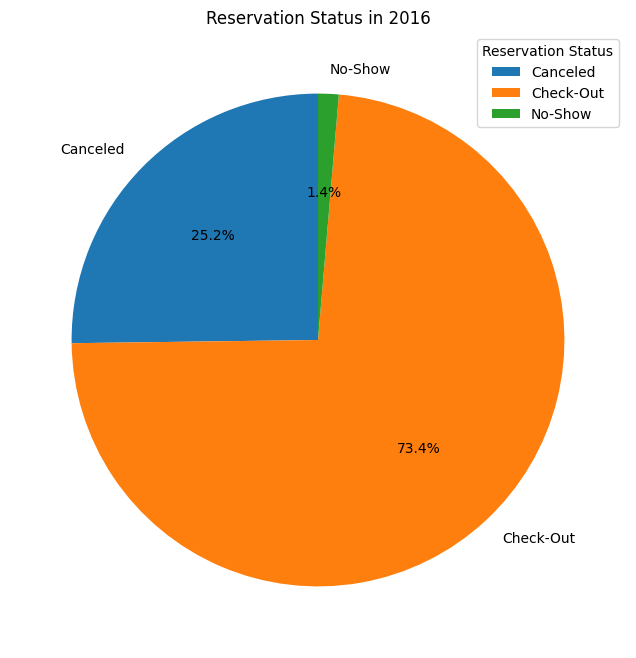

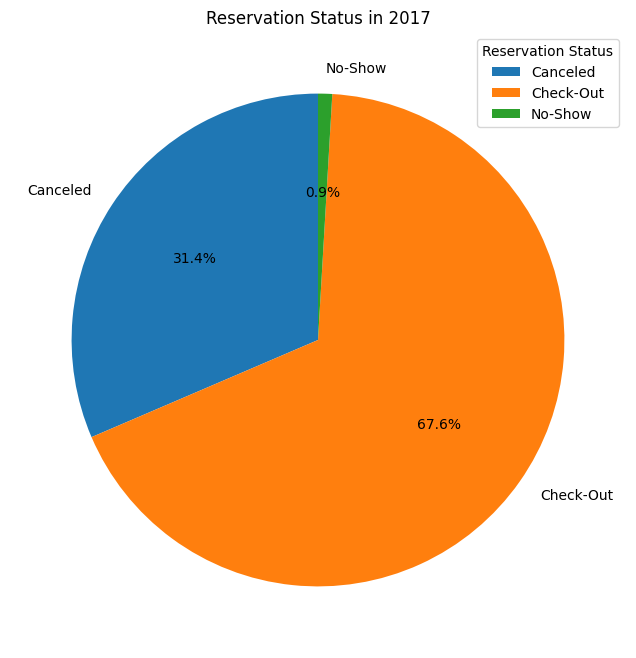

In [93]:
# gráfico pie reservation_status cada año graficado por separado para ver si hay una tendencia
# agrupar
reservation_status_by_year = df.groupby(['arrival_date_year', 'reservation_status']).size().unstack()

for year in reservation_status_by_year.index:
    plt.figure(figsize=(8, 8))
    reservation_status_by_year.loc[year].plot.pie(autopct='%1.1f%%', startangle=90)
    plt.title(f'Reservation Status in {year}')
    plt.ylabel('')
    plt.legend(title='Reservation Status', loc='best')
    plt.show()

### *Análisis*
- Del pairplot, se puede mirar que hay “grupos” dentro de algunas variables que tienen algún tipo de tendencia… Hay partes de arrival_date_weel_number tiene fragmentos correlacionados con lead_time donde hay una tendencia. Similar sucede con lead_time y days_in_waiting_list. También arrival_date_weekend_number con arrival_date_week_number hay una relación muy notoria de que tienen una tendencia. Previous_booking_not_canceled con arrival_date_week_number también tienen fragmentos de datos con una relación con tendencia positiva

- Del grafico de dispersión del tipo de cliente, pensión y cantidad de adultos, se puede apreciar que conforme a lo que se venía suponiendo, los datos que tienen un número alto de adultos, corresponde efectivamente a grupos donde la mayoría de estos tienen pensión media o solo hospedaje con desayuno.

- Conforme al histograma de adr, la tendencia del valor por noche (promedio) está alrededor de los 100 dólares, y conforme a la tendencia, pareciera ser datos con tendencia normal o en su defecto con la pesos hacía el lado izquierdo.

- Al separar este histograma en dos, dependiendo de si es un hotel de ciudad o un resort, se puede apreciar que en los resort los adr son menores, no solo en valor, sino en frecuencia, comparados con los de la ciudad, donde las frecuencias son mayores así como los valores de adr. Y al revisar estadísticos por separado, se puede apreciar que esto es correcto, hay valores menores en hasta 30 puntos en el valor de adr para resort comparado con city.

- Conforme al número de reservas por país para los 3 años, revisando el top10, se puede apreciar que en el 2015 después de Puerto Rico estaba España, mientras que para 2016 y 2017 dicha tendencia cambia, donde ya no es el segundo destino con mas reservaciones, sino el cuarto después de Gran Bretaña y Francia

- Finalmente, para los años observados, conforme al estado de la reserva, hay una tendencia en que aumenta la cancelación de estas

## b) Visualizaciones exploratorias multivariadas:
Crea dos tipos diferentes de visualizaciones multivariadas. Cada visualización debe incluir una breve interpretación dentro del archivo de código.

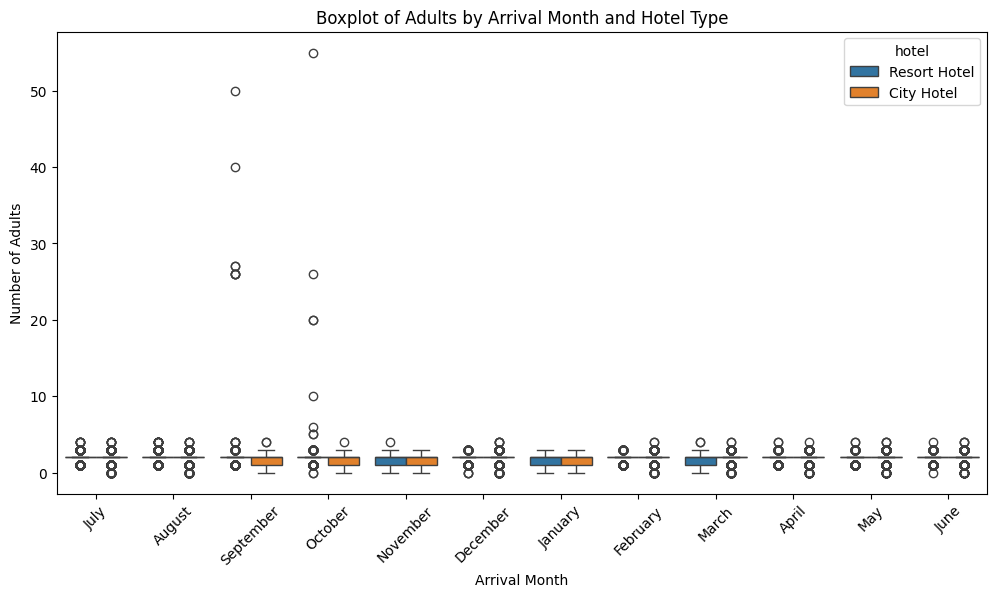

In [86]:
# boxplot con arrival_date_month por la cantidad de adultos

plt.figure(figsize=(12, 6))
sns.boxplot(x='arrival_date_month', y='adults', hue='hotel', data=df)
plt.title('Boxplot of Adults by Arrival Month and Hotel Type')
plt.xlabel('Arrival Month')
plt.ylabel('Number of Adults')
plt.xticks(rotation=45)
plt.show()

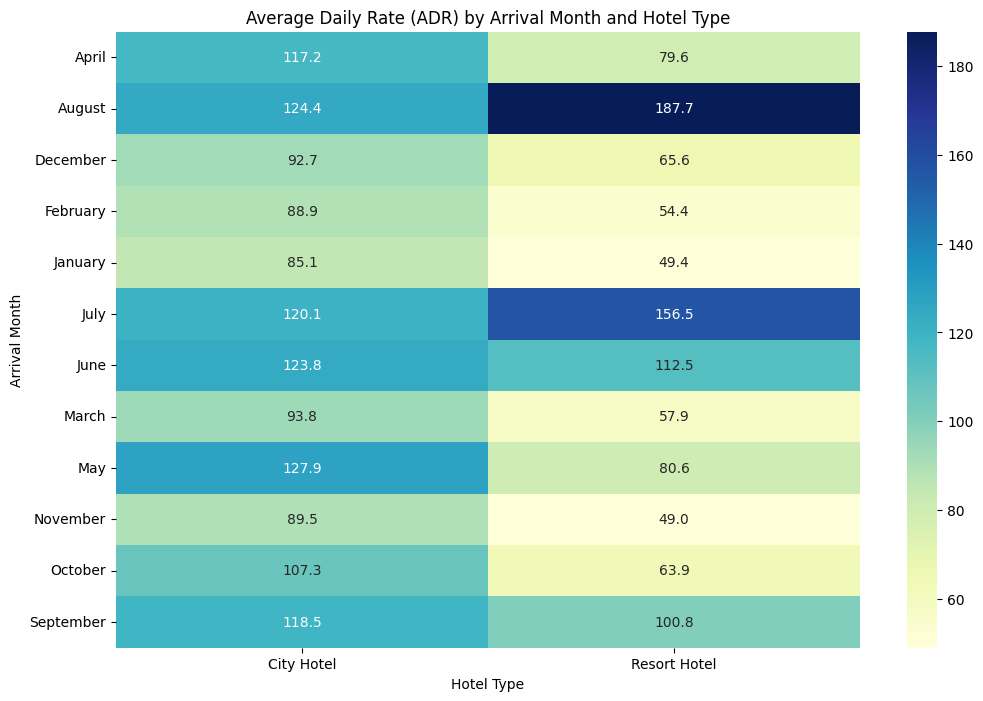

In [87]:
# Heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df.pivot_table(values='adr', index='arrival_date_month', columns='hotel'), annot=True, fmt=".1f", cmap="YlGnBu")
plt.title('Average Daily Rate (ADR) by Arrival Month and Hotel Type')
plt.xlabel('Hotel Type')
plt.ylabel('Arrival Month')
plt.show()

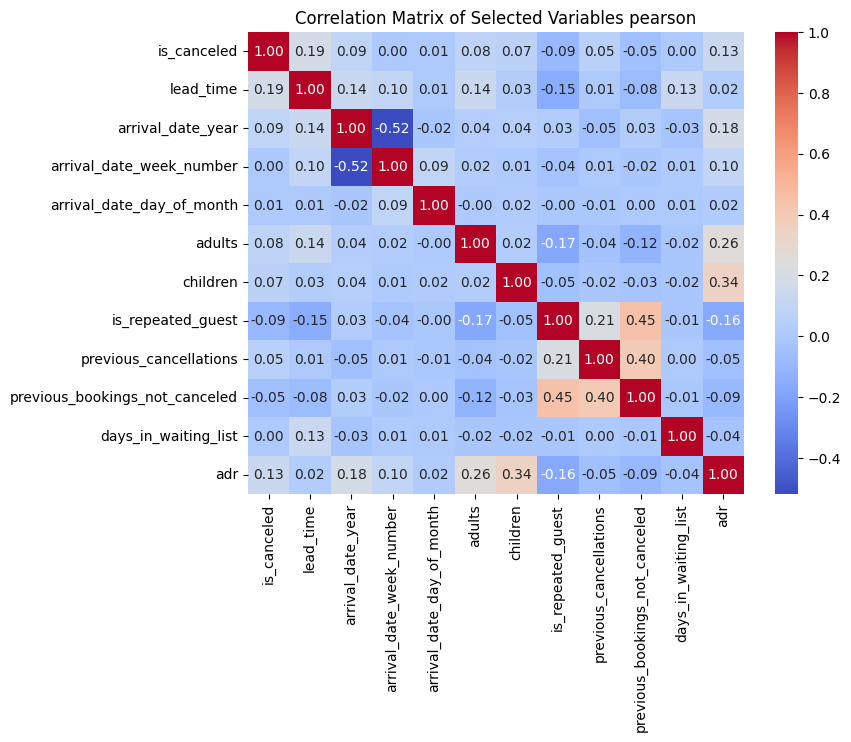

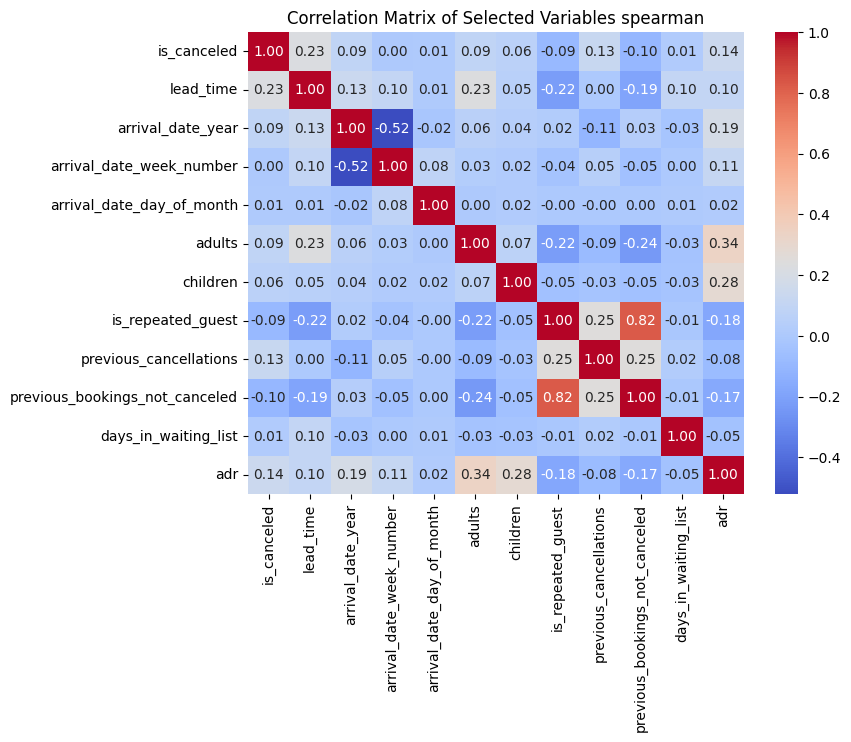

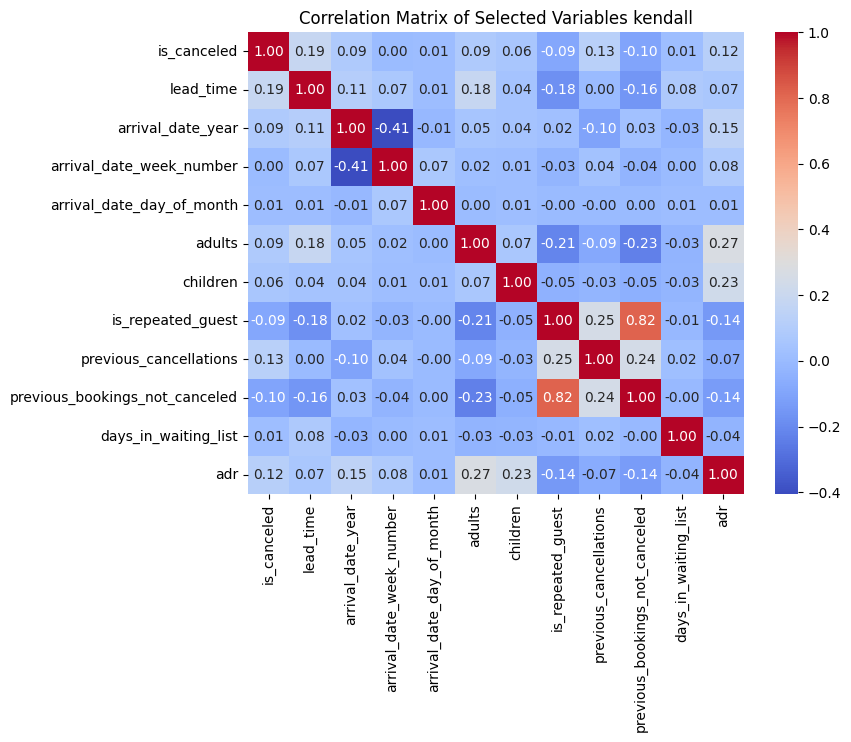

In [92]:
# Revisar correlaciones y graficarlas en heatmap
# Seleccionando variables a evaluar, solo las numéricas
selected_variables = ['is_canceled', 'lead_time','arrival_date_year','arrival_date_week_number','arrival_date_day_of_month',
                      'adults','children','is_repeated_guest','previous_cancellations','previous_bookings_not_canceled',
                      'days_in_waiting_list','adr']
correlation_data = df[selected_variables]

# Calcular correlaciones según lo visto,
correlation_matrix1 = correlation_data.corr(method='pearson')
correlation_matrix2 = correlation_data.corr(method='spearman')
correlation_matrix3 = correlation_data.corr(method='kendall')

# Graficar
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix1, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Selected Variables pearson')
plt.show()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix2, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Selected Variables spearman')
plt.show()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix3, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Selected Variables kendall')
plt.show()

### *Análisis*
- El primer gráfico que es un boxplot, muestra que donde hay más cantidad de adultos según la reserva se da en los meses de septiembre y octubre, y también en los resort, no en las ciudades, esto por ejemplo sirve para aprovechar con un área de marketing y sacar paquetes o descuentos, también revisar porque en estos meses se dan estos datos, posibles vacaciones, viajes de grupos particulares u otro

- Según el heatmap, los meses de septiembre y octubre tienen tarifas promedio (según la escala), pero en meses como enero, febrero, marzo y noviembre los valores de adr son menores en los Resort, mientras que en los hoteles de ciudad no existen estos valores bajos, todos están por el promedio o mediana, pero es evidente que en la temporada de mitad de año, junio, julio y agosto son los mayores valores de adr en los hoteles de resort

- Finalmente, si bien se realizaron las correlaciones y gráficos, no tengo aún claro las diferencias de los métodos, así que se realizaron las 3 estudiadas. Con la correlación de Pearson no pareciera haber variables correlacionadas (ya que no hay valores de menos de -0.5 o mayores de 0.5). Con la correlación de spearman se ve una correlación negativa de -0.52 entre arrival_date_week_number con arrival_date_year, y una positiva más alta (0.82) entre is_repeated_guest y previous_bookings_not_canceled. Algo similar se ve con la Correlación de kendall, -0.41 y 0.82 para las mismas relaciones.

        Esto sugiere por ejemplo que, los clientes que no cancelan las reservaciones tienden a volver.


# 3) Análisis adicional:


## a) Estadísticas descriptivas:
Proporciona un resumen estadístico del dataset, incluyendo medidas de tendencia central y dispersión para las variables numéricas.

### *Análisis*
Ya se realizó este tipo de análisis más arriba

## b) Identificación de tendencias:
Analiza y discute cualquier tendencia notable que observes en los datos, apoyándote en las visualizaciones y estadísticas descriptivas.

### *Análisis*
Ya se realizó este tipo de análisis más arriba

PD:

En cuanto al punto 3, quedo con la inquietud de si es necesario desarrollarlo nuevamente? Ya que arriba se desarrolla, pero al ser el segundo intento, si quedo con esa inquietud.
